In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Data_Train.csv")

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.shape

(10683, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
category = ['Airline', 'Source', 'Destination', 'Additional_Info']
category

['Airline', 'Source', 'Destination', 'Additional_Info']

In [8]:
for i in category:
    print(i , data[i].unique())

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Additional_Info ['No info' 'In-flight meal not included' 'No check-in baggage included'
 '1 Short layover' 'No Info' '1 Long layover' 'Change airports'
 'Business class' 'Red-eye flight' '2 Long layover']


In [9]:
category_cols=data.select_dtypes(include=['object']).columns
category_cols

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

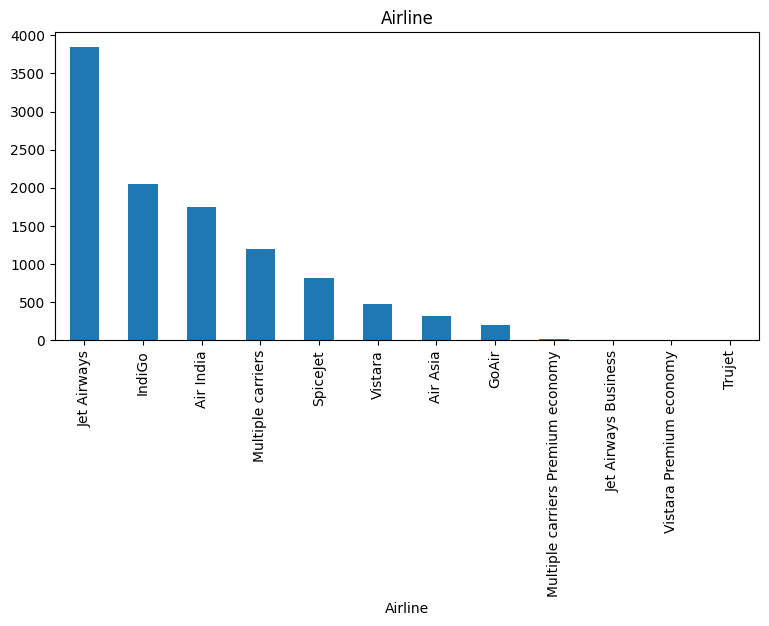

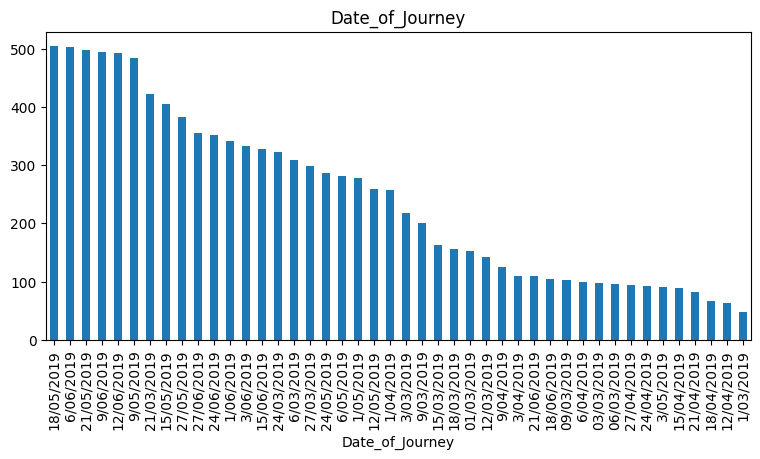

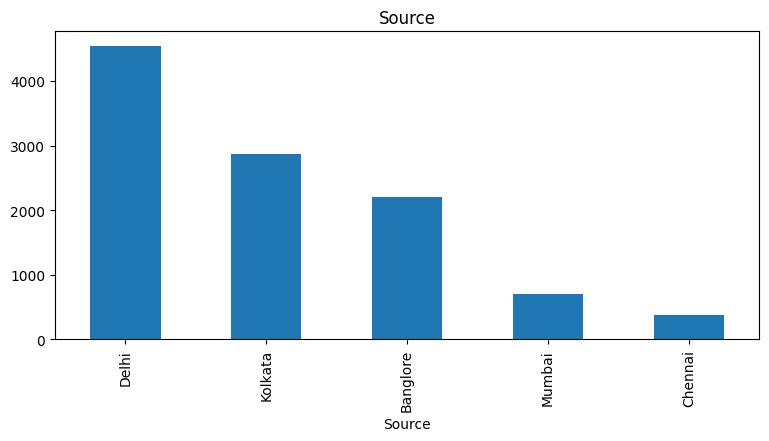

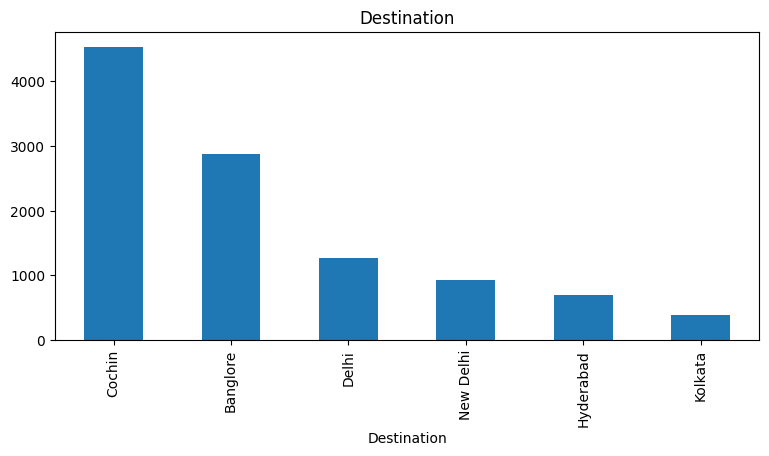

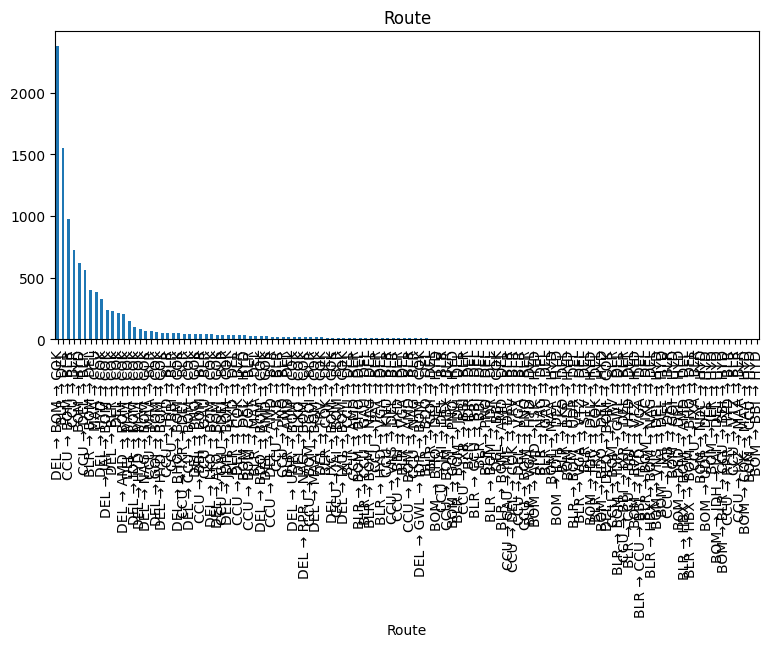

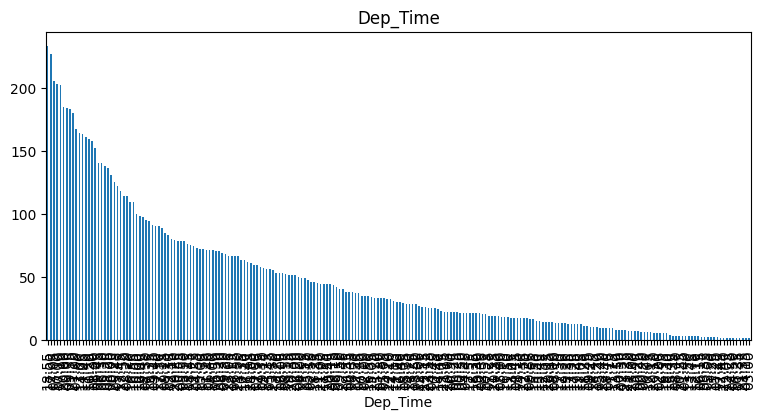

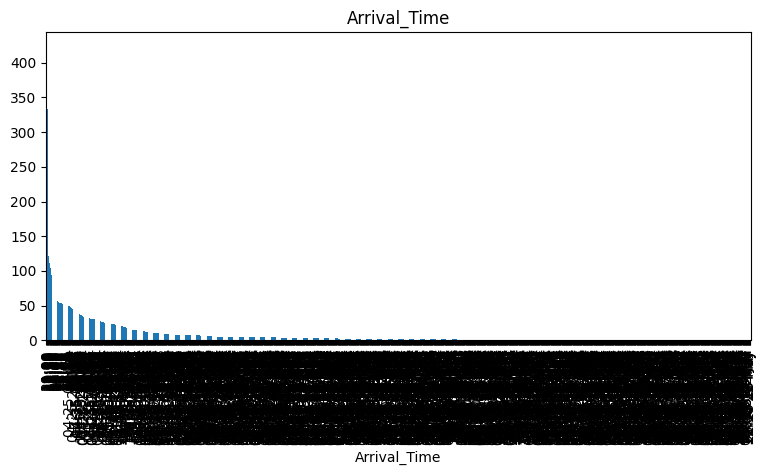

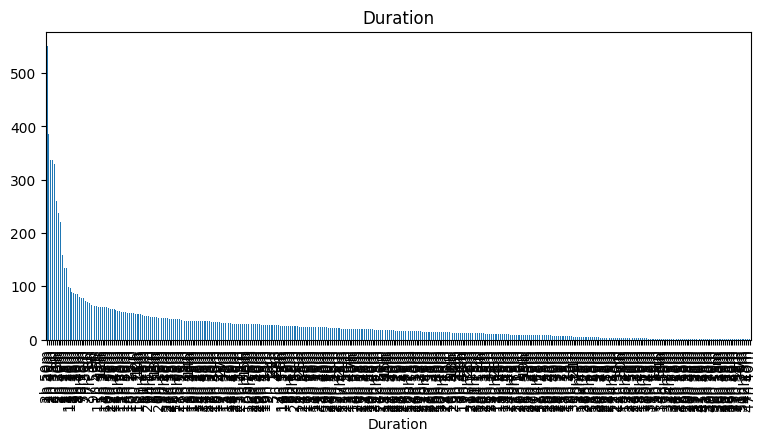

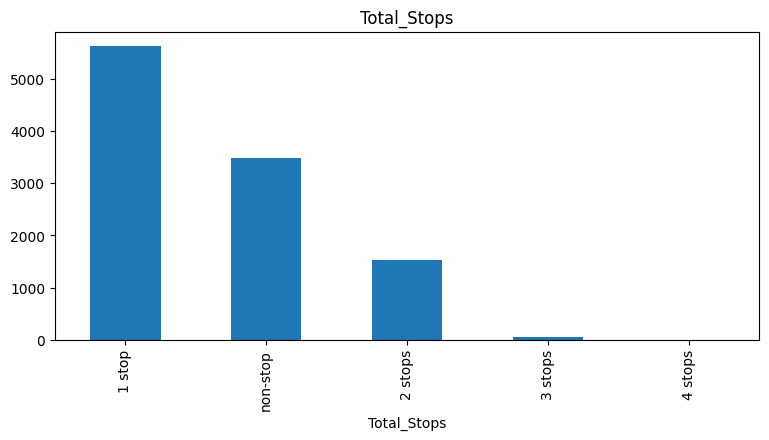

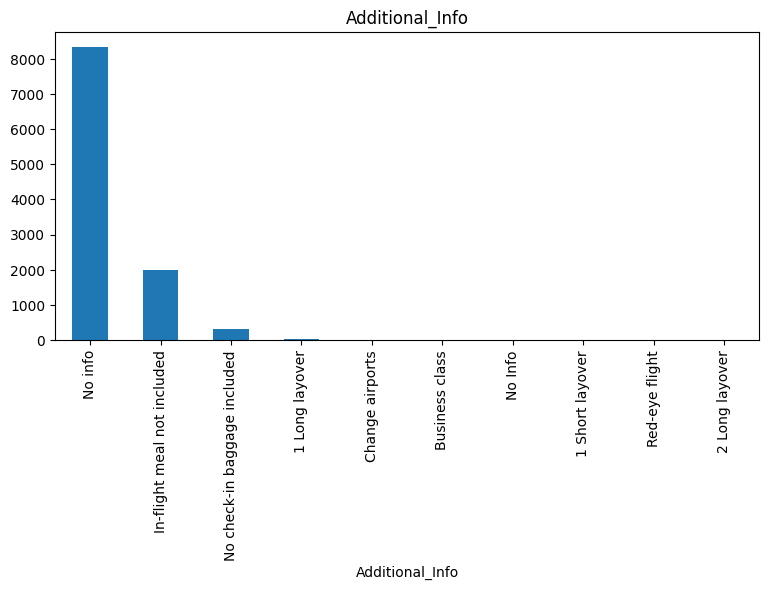

In [10]:
for column in category_cols:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    data[column].value_counts().plot(kind='bar')
    plt.title(column)

In [11]:
data.Route=data.Route.str.split('→')
data.Route

0                      [BLR ,  DEL]
1        [CCU ,  IXR ,  BBI ,  BLR]
2        [DEL ,  LKO ,  BOM ,  COK]
3               [CCU ,  NAG ,  BLR]
4               [BLR ,  NAG ,  DEL]
                    ...            
10678                  [CCU ,  BLR]
10679                  [CCU ,  BLR]
10680                  [BLR ,  DEL]
10681                  [BLR ,  DEL]
10682    [DEL ,  GOI ,  BOM ,  COK]
Name: Route, Length: 10683, dtype: object

In [12]:
data['City1']=data.Route.str[0]
data['City2']=data.Route.str[1]
data['City3']=data.Route.str[2]
data['City4']=data.Route.str[3]
data['City5']=data.Route.str[4]
data['City6']=data.Route.str[5]

In [13]:
data.Date_of_Journey=data.Date_of_Journey.str.split('/')
data.Date_of_Journey

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [14]:
data['Date']=data.Date_of_Journey.str[0]
data['Month']=data.Date_of_Journey.str[1]
data['Year']=data.Date_of_Journey.str[2]

In [15]:
data.Dep_Time=data.Dep_Time.str.split(':')

In [16]:
data['Dep_Time_Hour']=data.Dep_Time.str[0]
data['Dep_Time_Mins']=data.Dep_Time.str[1]

In [17]:
data.Arrival_Time=data.Arrival_Time.str.split(' ')

In [18]:
data['Arrival_date']=data.Arrival_Time.str[1]
data['Time_of_Arrival']=data.Arrival_Time.str[0]

In [19]:
data['Time_of_Arrival']=data.Time_of_Arrival.str.split(':')

In [20]:
data['Arrival_Time_Hour']=data.Time_of_Arrival.str[0]
data['Arrival_Time_Mins']=data.Time_of_Arrival.str[1]

In [21]:
data.Duration=data.Duration.str.split(' ')

In [22]:
data['Travel_Hours']=data.Duration.str[0]
data['Travel_Hours']=data['Travel_Hours'].str.split('h')
data['Travel_Hours']=data['Travel_Hours'].str[0]
data.Travel_Hours=data.Travel_Hours
data['Travel_Mins']=data.Duration.str[1]
data['Travel_Mins']=data.Travel_Mins.str.split('m')
data['Travel_Mins']=data.Travel_Mins.str[0]

In [23]:
data.Total_Stops.replace('non_stop',0,inplace=True)
data.Total_Stops=data.Total_Stops.str.split(' ')
data.Total_Stops=data.Total_Stops.str[0]

In [24]:
data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [25]:
data.Additional_Info.replace('No Info' , 'No info',inplace =True)

In [26]:
data.isnull().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    1
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops              1
Additional_Info          0
Price                    0
City1                    1
City2                    1
City3                 3492
City4                 9117
City5                10637
City6                10682
Date                     0
Month                    0
Year                     0
Dep_Time_Hour            0
Dep_Time_Mins            0
Arrival_date          6348
Time_of_Arrival          0
Arrival_Time_Hour        0
Arrival_Time_Mins        0
Travel_Hours             0
Travel_Mins           1032
dtype: int64

In [27]:
data.drop(['City4','City5','City6'],axis=1,inplace=True)

In [28]:
data.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Duration'],axis=1,inplace=True)
data.drop(['Time_of_Arrival'],axis=1,inplace=True)

In [29]:
data.isnull().sum()

Airline                 0
Source                  0
Destination             0
Total_Stops             1
Additional_Info         0
Price                   0
City1                   1
City2                   1
City3                3492
Date                    0
Month                   0
Year                    0
Dep_Time_Hour           0
Dep_Time_Mins           0
Arrival_date         6348
Arrival_Time_Hour       0
Arrival_Time_Mins       0
Travel_Hours            0
Travel_Mins          1032
dtype: int64

In [30]:
data['City3'].fillna('None',inplace=True)

In [31]:
data['Arrival_date'].fillna(data['Date'],inplace=True)

In [32]:
data['Travel_Mins'].fillna(0,inplace=True)

In [33]:
#data.Total_Stops=data.Total_Stops.astype('int64')
data.Date=data.Date.astype('int64')
data.Month=data.Month.astype('int64')
data.Year=data.Year.astype('int64')
data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64')
data.Dep_Time_Hour=data.Dep_Time_Hour.astype('int64')
data.Dep_Time_Mins=data.Dep_Time_Mins.astype('int64')
data.Arrival_date=data.Arrival_date.astype('int64')
data.Arrival_Time_Hour=data.Arrival_Time_Hour.astype('int64')
data.Arrival_Time_Mins=data.Arrival_Time_Mins.astype('int64')
#data.Travel_Hours=data.Travel_Hours.astype('int64')
data.Travel_Mins=data.Travel_Mins.astype('int64')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10683 non-null  object
 1   Source             10683 non-null  object
 2   Destination        10683 non-null  object
 3   Total_Stops        10682 non-null  object
 4   Additional_Info    10683 non-null  object
 5   Price              10683 non-null  int64 
 6   City1              10682 non-null  object
 7   City2              10682 non-null  object
 8   City3              10683 non-null  object
 9   Date               10683 non-null  int64 
 10  Month              10683 non-null  int64 
 11  Year               10683 non-null  int64 
 12  Dep_Time_Hour      10683 non-null  int64 
 13  Dep_Time_Mins      10683 non-null  int64 
 14  Arrival_date       10683 non-null  int64 
 15  Arrival_Time_Hour  10683 non-null  int64 
 16  Arrival_Time_Mins  10683 non-null  int64

In [35]:
data[data['Travel_Hours']=='5m']

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,City1,City2,City3,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
6474,Air India,Mumbai,Hyderabad,2,No info,17327,BOM,GOI,PNQ,6,3,2019,16,50,6,16,55,5m,0


In [36]:
data.drop(index=6474,inplace=True,axis=0)

In [37]:
data.Travel_Hours=data.Travel_Hours.astype('int64')

In [38]:
categorical=['Airline','Source','Destination','Additional_Info','city1']
numerical=['Total_Stops','Date','month','year','Dep_Time_Hour','Dep_Time_Mins','Arrival_date', 'Arrival_Time_Hour', 'Arrival_Time_Mins', 'Travel_Mins']

ValueError: could not convert string to float: 'IndiGo'

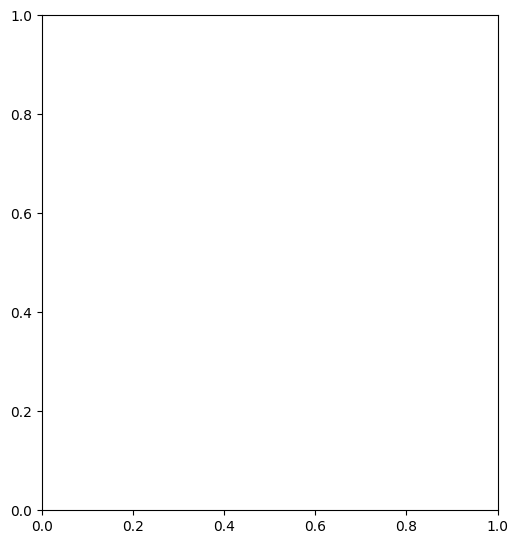

In [39]:
import seaborn as sns
c=1
plt.figure(figsize=(20,45))

for i in categorical:
    plt.subplot(6,3,c)
    sns.countplot(data[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c=c+1

plt.show()

C:\Users\gokul.raj\AppData\Local\Temp\ipykernel_7344\2600363028.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Price)


<Axes: xlabel='Price', ylabel='Density'>

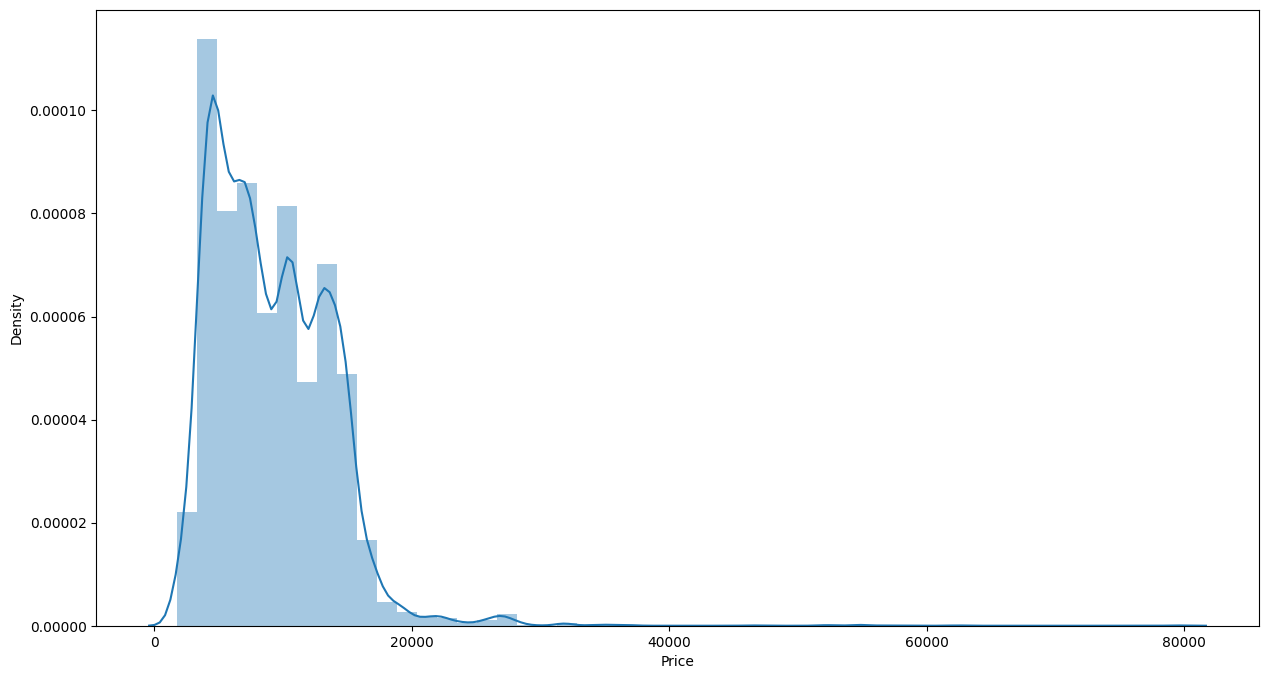

In [40]:
plt.figure(figsize=(15,8))
sns.distplot(data.Price)

In [41]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'City1', 'City2', 'City3', 'Date', 'Month', 'Year',
       'Dep_Time_Hour', 'Dep_Time_Mins', 'Arrival_date', 'Arrival_Time_Hour',
       'Arrival_Time_Mins', 'Travel_Hours', 'Travel_Mins'],
      dtype='object')

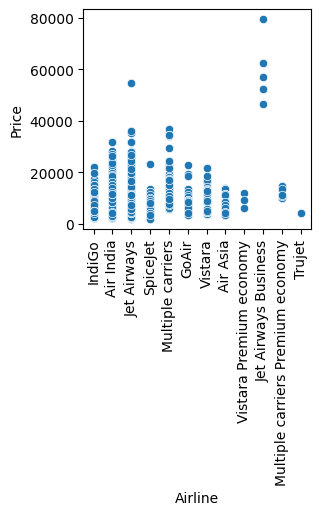

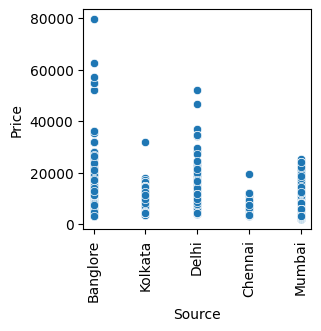

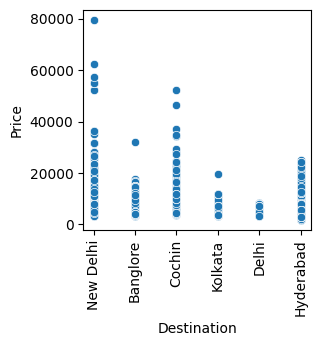

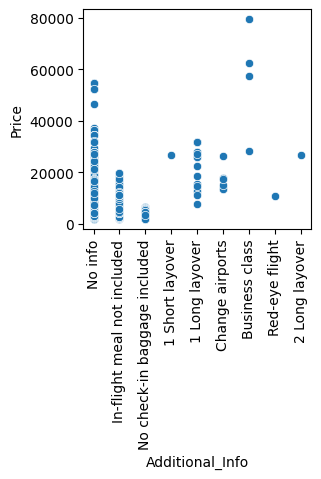

KeyError: 'city1'

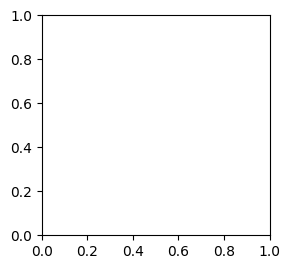

In [42]:
import seaborn as sns
c=1

for  i in categorical:
    plt.figure(figsize=(10,20))
    plt.subplot(6,3,c)
    sns.scatterplot(x=data[i],y=data.Price)
    plt.xticks(rotation=90)
    #plt.tight_Layout(pad=3.0)
    c=c+1
    plt.show()

In [43]:
data[data.Price>50000]
data.head()
pd.set_option('display.max_columns',25)
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,City1,City2,City3,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,BLR,DEL,None,24,3,2019,22,20,22,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,CCU,IXR,BBI,1,5,2019,5,50,1,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,DEL,LKO,BOM,9,6,2019,9,25,10,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,CCU,NAG,BLR,12,5,2019,18,5,12,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,BLR,NAG,DEL,1,3,2019,16,50,1,21,35,4,45


In [45]:
data['Year'].max()

2019

In [46]:
sns.heatmap(data.corr(),annot=True)

ValueError: could not convert string to float: 'IndiGo'

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  object
 1   Source             10682 non-null  object
 2   Destination        10682 non-null  object
 3   Total_Stops        10681 non-null  object
 4   Additional_Info    10682 non-null  object
 5   Price              10682 non-null  int64 
 6   City1              10681 non-null  object
 7   City2              10681 non-null  object
 8   City3              10682 non-null  object
 9   Date               10682 non-null  int64 
 10  Month              10682 non-null  int64 
 11  Year               10682 non-null  int64 
 12  Dep_Time_Hour      10682 non-null  int64 
 13  Dep_Time_Mins      10682 non-null  int64 
 14  Arrival_date       10682 non-null  int64 
 15  Arrival_Time_Hour  10682 non-null  int64 
 16  Arrival_Time_Mins  10682 non-null  int64 
 17

In [48]:
data

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,City1,City2,City3,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,BLR,DEL,None,24,3,2019,22,20,22,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,CCU,IXR,BBI,1,5,2019,5,50,1,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,DEL,LKO,BOM,9,6,2019,9,25,10,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,CCU,NAG,BLR,12,5,2019,18,5,12,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,BLR,NAG,DEL,1,3,2019,16,50,1,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,4107,CCU,BLR,None,9,4,2019,19,55,9,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,CCU,BLR,None,27,4,2019,20,45,27,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,No info,7229,BLR,DEL,None,27,4,2019,8,20,27,11,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,BLR,DEL,None,1,3,2019,11,30,1,14,10,2,40


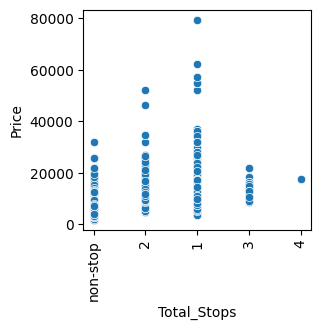

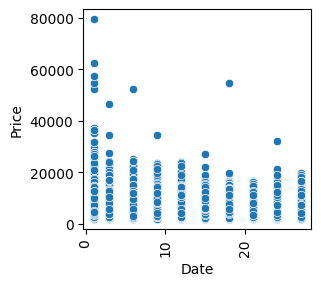

KeyError: 'month'

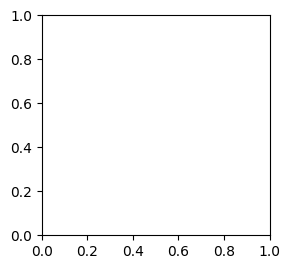

In [51]:
c=1

for i in numerical:
    plt.figure(figsize=(10,20))
    plt.subplot(6,3,c)
    sns.scatterplot(x=data[i], y= data.Price)
    plt.xticks(rotation=90)
    #plt.tight_Layout(pad=3.0)
    c=c+1
    plt.show()

<Axes: >

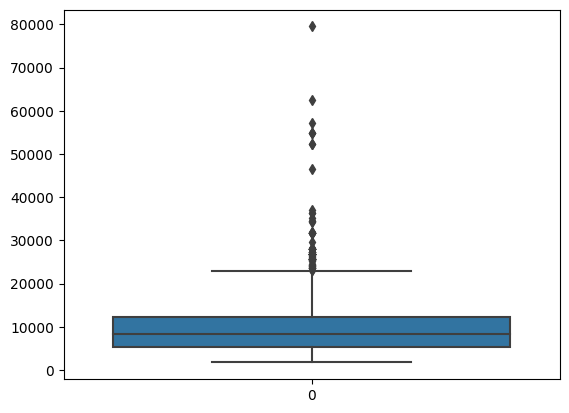

In [53]:
import seaborn as sns
sns.boxplot(data['Price'])

In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [56]:
data.Airline=le.fit_transform(data.Airline)
data.Source=le.fit_transform(data.Source)
data.Destination=le.fit_transform(data.Destination)
data.Total_Stops=le.fit_transform(data.Total_Stops)
data.City1=le.fit_transform(data.City1)
data.City2=le.fit_transform(data.City2)
data.City3=le.fit_transform(data.City3)
data.Additional_Info=le.fit_transform(data.Additional_Info)
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,City1,City2,City3,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,3,0,5,4,7,3897,0,13,29,24,3,2019,22,20,22,1,10,2,50
1,1,3,0,1,7,7662,2,25,1,1,5,2019,5,50,1,13,15,7,25
2,4,2,1,1,7,13882,3,32,4,9,6,2019,9,25,10,4,25,19,0
3,3,3,0,0,7,6218,2,34,3,12,5,2019,18,5,12,23,30,5,25
4,3,0,5,0,7,13302,0,34,8,1,3,2019,16,50,1,21,35,4,45


In [57]:
data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,City1,City2,City3,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,3,0,5,4,7,3897,0,13,29,24,3,2019,22,20,22,1,10,2,50
1,1,3,0,1,7,7662,2,25,1,1,5,2019,5,50,1,13,15,7,25
2,4,2,1,1,7,13882,3,32,4,9,6,2019,9,25,10,4,25,19,0
3,3,3,0,0,7,6218,2,34,3,12,5,2019,18,5,12,23,30,5,25
4,3,0,5,0,7,13302,0,34,8,1,3,2019,16,50,1,21,35,4,45


In [59]:
data=data[['Airline','Source', 'Destination','Date','Month','Year','Dep_Time_Hour','Dep_Time_Mins','Arrival_date','Arrival_Time_Hour' , 'Arrival_Time_Mins','Price']]

In [60]:
data.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Price
0,3,0,5,24,3,2019,22,20,22,1,10,3897
1,1,3,0,1,5,2019,5,50,1,13,15,7662
2,4,2,1,9,6,2019,9,25,10,4,25,13882
3,3,3,0,12,5,2019,18,5,12,23,30,6218
4,3,0,5,1,3,2019,16,50,1,21,35,13302


In [61]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [62]:
data1=ss.fit_transform(data)

In [63]:
data1=pd.DataFrame(data1,columns=data.columns)
data1.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Price
0,-0.410805,-1.658435,2.416778,1.237288,-1.467707,0.0,1.654268,-0.234932,0.955750,-1.800319,-0.889984,-1.125496
1,-1.261152,0.890299,-0.973732,-1.475307,0.250153,0.0,-1.303000,1.363674,-1.524648,-0.050813,-0.587017,-0.308912
2,0.014369,0.040721,-0.295630,-0.531796,1.109082,0.0,-0.607172,0.031502,-0.461621,-1.362943,0.018918,1.040132
3,-0.410805,0.890299,-0.973732,-0.177979,0.250153,0.0,0.958440,-1.034235,-0.225392,1.407109,0.321885,-0.622099
4,-0.410805,-1.658435,2.416778,-1.475307,-1.467707,0.0,0.610527,1.363674,-1.524648,1.115525,0.624852,0.914337


In [64]:
y=data1['Price']
x=data1.drop(columns=['Price'],axis=1)

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [66]:
x_train.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins
10004,0.864716,0.040721,-0.29563,1.591104,0.250153,0.0,-0.781129,0.297937,1.546321,0.823940,-0.587017
3684,0.014369,0.040721,-0.29563,-0.531796,0.250153,0.0,-0.259258,0.297937,-0.461621,-0.196605,0.624852
1034,1.715063,0.040721,-0.29563,1.237288,-0.608777,0.0,0.436570,1.097240,1.191978,1.261317,-1.192952
3909,0.864716,0.040721,-0.29563,0.883471,-1.467707,0.0,-0.085301,1.363674,0.955750,-1.800319,0.624852
3088,-1.261152,0.040721,-0.29563,1.237288,1.109082,0.0,0.784483,-0.501367,1.310092,0.823940,-0.587017


In [67]:
x_train.shape

(8545, 11)

In [68]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
rfr=RandomForestRegressor()
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()

In [69]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

for i in [rfr,gb,ad]:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    test_score=r2_score(y_test,y_pred)
    train_score=r2_score(y_train, i.predict(x_train))
    if abs(train_score-test_score)<=0.2:
        print(i)
        print("R2 score is " , r2_score(y_test , y_pred))
        print("R2 for train data " , r2_score(y_train, i.predict(x_train)))
        print("Mean Absolute Error is " , mean_absolute_error(y_pred,y_test))
        print("Mean Squared Error is " , mean_squared_error(y_pred,y_test))
        print("Root Mean Squared Error is ", (mean_squared_error(y_pred,y_test,squared=False)))  

RandomForestRegressor()
R2 score is  0.8500046230387994
R2 for train data  0.9497370650161413
Mean Absolute Error is  0.25511602930617083
Mean Squared Error is  0.1491539329524138
Root Mean Squared Error is  0.3862045221801705
GradientBoostingRegressor()
R2 score is  0.7652984210151785
R2 for train data  0.7338510043179753
Mean Absolute Error is  0.36493014902894827
Mean Squared Error is  0.23338495015604988
Root Mean Squared Error is  0.48309931707263865
AdaBoostRegressor()
R2 score is  0.27010670375616563
R2 for train data  0.30364360454651473
Mean Absolute Error is  0.690975318488145
Mean Squared Error is  0.7257987411073993
Root Mean Squared Error is  0.8519382261099682


In [85]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.12.0-cp311-cp311-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp311-cp311-win_amd64.whl (272.9 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.8.0-cp311-cp311-win_amd64.whl (2.6 MB)
  Using cached jax-0.4.8-py3-none-any.whl
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached grpcio-1.54.0-cp311-cp311-win_amd64.whl (4.1 MB)
  Using cached tensorboard-2.12.2-py3-none-any.whl (5.6 MB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Using cached ml_dtypes-0.1.0-cp311-cp311-win_amd64.whl (120 kB)
  Using cached google_auth-2.17.3-py2.py3-none-any.whl (178 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using 

In [70]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [71]:
model = keras.Sequential()
model.add(Dense(7, activation = 'relu', input_dim=11))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(7, activation = 'linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 84        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


In [72]:
model.compile(loss = 'mse', optimizer = 'rmsprop', metrics =['mae'])

In [73]:
model.fit(x_train, y_train, batch_size = 20, epochs = 10)

Epoch 1/10
428/428 [==============================] - 2s 3ms/step - loss: 1.0074 - mae: 0.7804
Epoch 2/10
428/428 [==============================] - 1s 3ms/step - loss: 0.9083 - mae: 0.7306
Epoch 3/10
428/428 [==============================] - 1s 3ms/step - loss: 0.8354 - mae: 0.6851
Epoch 4/10
428/428 [==============================] - 1s 3ms/step - loss: 0.7887 - mae: 0.6575
Epoch 5/10
428/428 [==============================] - 1s 3ms/step - loss: 0.7614 - mae: 0.6416
Epoch 6/10
428/428 [==============================] - 1s 3ms/step - loss: 0.7398 - mae: 0.6280
Epoch 7/10
428/428 [==============================] - 1s 3ms/step - loss: 0.7214 - mae: 0.6178
Epoch 8/10
428/428 [==============================] - 1s 3ms/step - loss: 0.7052 - mae: 0.6095
Epoch 9/10
428/428 [==============================] - 1s 3ms/step - loss: 0.6913 - mae: 0.6024
Epoch 10/10
428/428 [==============================] - 1s 3ms/step - loss: 0.6804 - mae: 0.5973


In [74]:
from sklearn.model_selection import cross_val_score
for i in range(2,5):
    cv = cross_val_score(rfr,x,y,cv=i)
    print(rfr,cv.mean())

RandomForestRegressor() 0.7889644234778486
RandomForestRegressor() 0.7920878914649059
RandomForestRegressor() 0.7991968206271601


In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [76]:
param_grid={'n_estimators':[10,30,50,70,100],'max_depth':[None,1,2,3],'max_features':['auto','sqrt']}
rfr=RandomForestRegressor()
rf_res=RandomizedSearchCV(estimator=rfr,param_distributions=param_grid,cv=3,verbose=2, n_jobs=-1)
rf_res.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\gokul.raj\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 1, 2, 3],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 30, 50, 70, 100]},
                   verbose=2)

In [77]:
gb=GradientBoostingRegressor()
gb_res=RandomizedSearchCV(estimator=gb,param_distributions=param_grid,cv=3,verbose=2, n_jobs=-1)
gb_res.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 1, 2, 3],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 30, 50, 70, 100]},
                   verbose=2)

In [78]:
rfr=RandomForestRegressor(n_estimators=10,max_features='sqrt',max_depth=None)
rfr.fit(x_train,y_train)
y_train_pred=rfr.predict(x_train)
y_test_pred=rfr.predict(x_test)
print("train accurancy " ,r2_score(y_train_pred, y_train))
print("test  accurancy " ,r2_score(y_test_pred, y_test))

train accurancy  0.9270496917205961
test  accurancy  0.7593118186485962


In [79]:
from sklearn.model_selection import cross_val_score
for i in range(2,5):
    cv=cross_val_score(gb,x,y,cv=i)
    print(rfr,cv.mean())

RandomForestRegressor(max_features='sqrt', n_estimators=10) 0.7261355922035433
RandomForestRegressor(max_features='sqrt', n_estimators=10) 0.7295103241747761
RandomForestRegressor(max_features='sqrt', n_estimators=10) 0.7277004856367204


In [80]:
gb=GradientBoostingRegressor(n_estimators=10,max_features='sqrt',max_depth=None)
gb.fit(x_train,y_train)
y_train_pred=gb.predict(x_train)
y_test_pred=gb.predict(x_test)
print("train accurancy ", r2_score(y_train_pred,y_train))
print("test accurancy ", r2_score(y_test_pred,y_test))

train accurancy  0.6364865173543217
test accurancy  0.23064042675567253


In [101]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [81]:
from sklearn.neighbors  import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

knn=KNeighborsRegressor()
svr=SVR()
dt=DecisionTreeRegressor()

for i in [knn,svr,dt]:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    test_score=r2_score(y_test,y_pred)
    train_score=r2_score(y_train,i.predict(x_train))
    if abs(train_score-test_score)<=0.1:
        print(i)
        print('R2 Score is ' , r2_score(y_test, y_pred))
        print('R2 Score for train data ' , r2_score(y_train, i.predict(x_train)))
        print('Mean Absoluate Error is ', mean_absolute_error(y_test, y_pred))
        print('Mean Squared  Error is ' , mean_squared_error(y_test, y_pred))
        print('Root Mean Squared Error is ' , (mean_squared_error(y_test,y_pred,squared=False)))

KNeighborsRegressor()
R2 Score is  0.7350062836431042
R2 Score for train data  0.7881405903671358
Mean Absoluate Error is  0.3579948911266574
Mean Squared  Error is  0.2635071547073835
Root Mean Squared Error is  0.513329479678874
SVR()
R2 Score is  0.624812803408759
R2 Score for train data  0.5957444387377189
Mean Absoluate Error is  0.41628884587877085
Mean Squared  Error is  0.37308247159810426
Root Mean Squared Error is  0.6108047737191519


In [82]:
knn=KNeighborsRegressor(n_neighbors=2,algorithm='auto',metric_params=None,n_jobs=-1)
knn.fit(x_train,y_train)
y_train_pred=knn.predict(x_train)
y_test_pred=knn.predict(x_test)
print("train accurancy " ,r2_score(y_train_pred,y_train))
print("test accurancy " ,r2_score(y_test_pred,y_test))

train accurancy  0.8799059411782475
test accurancy  0.7033065220100643


In [83]:
from sklearn.model_selection import cross_val_score
for i in range(2,5):
    cv = cross_val_score(knn,x,y,cv=i)
    print(knn,cv.mean())

KNeighborsRegressor(n_jobs=-1, n_neighbors=2) 0.628918598912539
KNeighborsRegressor(n_jobs=-1, n_neighbors=2) 0.6460091246433299
KNeighborsRegressor(n_jobs=-1, n_neighbors=2) 0.6638636766917546


In [84]:
predicted_values = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

In [85]:
predicted_values

,Actual,Predicted
6075,1.641563,1.681688
3544,-0.895161,-0.895161
9290,0.021842,-0.217169
5032,-1.133955,-1.190563
2483,0.826714,1.516636
...,...,...
9796,-0.364002,0.976150
9870,-0.968253,-0.968253
10062,-0.354459,-0.636414
8802,-0.439479,-0.477434


In [86]:
prices = rfr.predict(x_test)

In [87]:
price_list = pd.DataFrame({'Price':prices})

In [88]:
price_list

,Price
0,1.260686
1,-0.719308
2,-0.004336
3,-1.179241
4,1.292860
...,...
2132,0.980705
2133,-0.510011
2134,-0.504567
2135,-0.025288


In [89]:
import pickle
pickle.dump(rfr, open('model1.pkl', 'wb'))